In [2]:
import numpy as np
import librosa, librosa.display
import matplotlib.pyplot as plt
import IPython

In [3]:
y, sr = librosa.load("piano5.wav")
print(sr)
print(len(y))  #y = duratata semnal in secunde * rata de esantionare sr

22050
26103


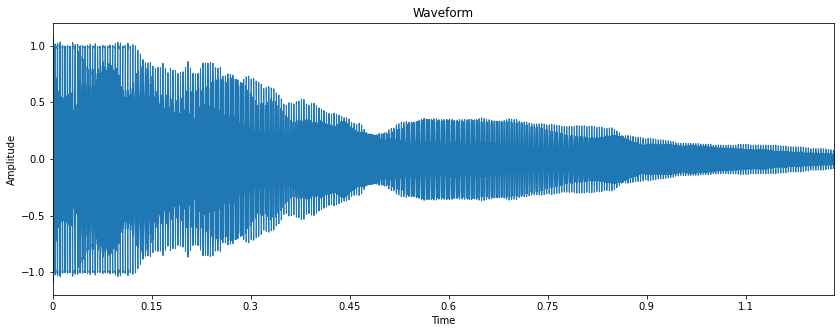

In [4]:
plt.figure(figsize=(14,5))
plt.ylabel("Amplitude")
plt.title("Waveform")
librosa.display.waveplot(y, sr=sr)

In [5]:
IPython.display.Audio(y, rate=sr)

In [6]:
from scipy.fftpack import fft, fftshift

semnal_fft = fft(y, len(y))/(len(y)/2)

#Afisam primii 10 coef FFT
print('\n'.join(["Coef #"+str(i+1).zfill(2)+":"+str(x) 
                for i,x in enumerate(semnal_fft[:10])]))

Coef #01:(-0.0071087987+0j)
Coef #02:(-0.00554354+0.0012731972j)
Coef #03:(-0.004528807+0.002662256j)
Coef #04:(-0.0031990723+0.0029429365j)
Coef #05:(-0.002358938+0.0026240554j)
Coef #06:(-0.0017978142+0.0019417778j)
Coef #07:(-0.0014464404+0.001264292j)
Coef #08:(-0.0014380335+0.0010419703j)
Coef #09:(-0.0018257176+0.0012080421j)
Coef #10:(-0.0020492598+0.0018628482j)


In [7]:
#Esantionare semnal
fereastra = int(80*1e-3*sr)
print("Fereastra are %d esantioane" %fereastra)

Fereastra are 1764 esantioane


In [8]:
#Ajustam fereastra la o putere a lui 2
fereastra_fft = int(2**np.ceil(np.log2(fereastra)))
print("Fereastra FFT are %d esantioane" %fereastra_fft)

Fereastra FFT are 2048 esantioane


In [9]:
#Ferestre suprapuse
#Factorul de suprapunere
p=0
#Numar cadre suprapuse
numar_cadre_fft = int(len(y)/(fereastra_fft*(1-p)))
print("Numarul de cadre este %d" %numar_cadre_fft)

Numarul de cadre este 12


Text(0, 0.5, 'Amplitude')

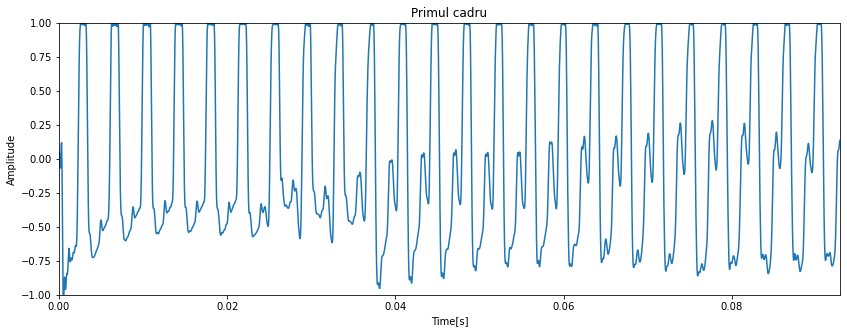

In [10]:
#Luam primul cadru
k=0
cadru_1 = y[int(k*(1-p)*fereastra_fft):int((k*(1-p)+1)*fereastra_fft)]

time_axis = np.arange(0, fereastra_fft)/sr
duration = fereastra_fft/sr

#Plot semnal
plt.figure(figsize=[14,5])
plt.plot(time_axis,cadru_1)
plt.xlim([0, duration])
plt.ylim([-1,1])
plt.title('Primul cadru')
plt.xlabel('Time[s]')
plt.ylabel('Amplitude')

Text(0.5, 1.0, 'Phase spectrum')

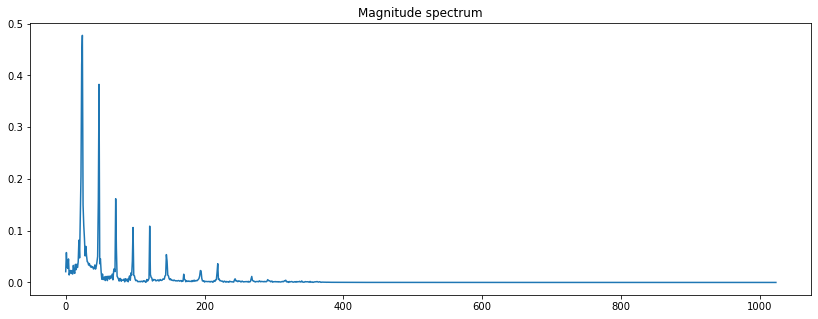

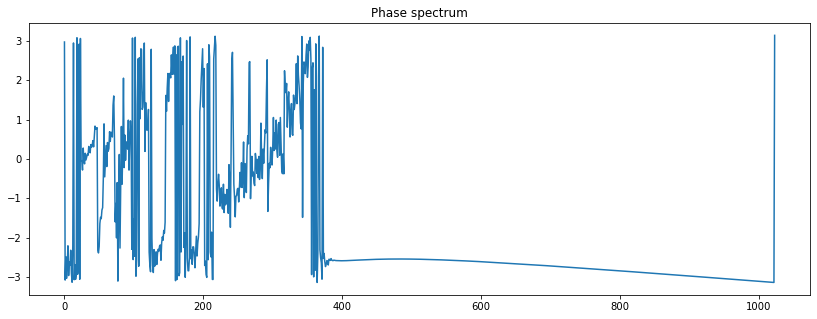

In [11]:
#Calculam FFT pentru primul cadru

cadru_fft_1 = fft(cadru_1, fereastra_fft)/(fereastra_fft/2)

#Spectrul de amplitudini si faze pentru primul cadru
#Vom folosi doar coeficientii coresp frecv pozitive

magnitude_spectrum_1 = np.abs(cadru_fft_1[len(cadru_fft_1)//2:][::-1])
phase_spectrum_1 = np.angle(cadru_fft_1[len(cadru_fft_1)//2:][::-1])

plt.figure(figsize=[14,5])
plt.plot(magnitude_spectrum_1)
plt.title("Magnitude spectrum")

plt.figure(figsize=[14,5])
plt.plot(phase_spectrum_1)
plt.title("Phase spectrum")

Text(0.5, 1.0, 'Phase spectrum')

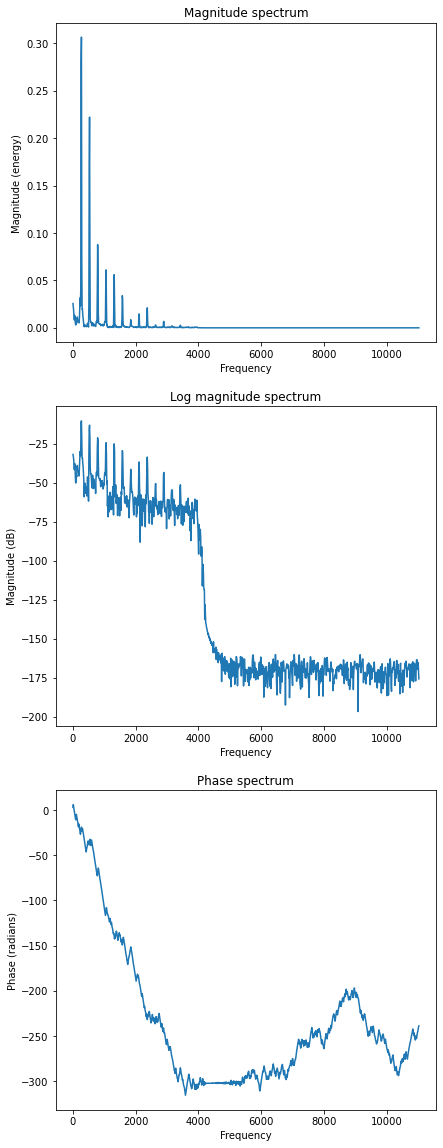

In [12]:
plt.figure(figsize=[15,20])

plt.subplot(3,2,1)
plt.magnitude_spectrum(cadru_1, Fs=sr)
plt.title("Magnitude spectrum")
plt.subplot(3,2,3)
plt.magnitude_spectrum(cadru_1, Fs=sr, scale = 'dB')
plt.title("Log magnitude spectrum")
plt.subplot(3,2,5)
plt.phase_spectrum(cadru_1, Fs=sr)
plt.title("Phase spectrum")

Spectograma

(0.0, 5000.0)

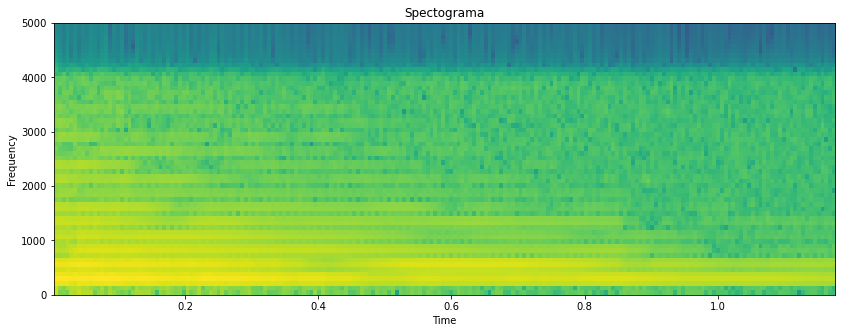

In [41]:
plt.figure(figsize=(14,5))
powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(y, Fs=sr)
plt.title('Spectograma')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.ylim(0,5000)